# Case study 2: 
#2. Understanding the sleep pattern and other important insights


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [4]:
df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [6]:
df['Id'].nunique()

24

### we have sleep data for 24 users out of total 34 users. 
* This shows that some of the users are not comfortable wearing the smartdevice while sleeping
* The analysis will have to be carried on the 24 users 

"SleepDay" is in object format, lets change that into DateTime format. Also its a per day data so we can drop the time part of the Datetime values.

In [5]:
df['SleepDay']=pd.to_datetime(df['SleepDay'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [8]:
df['SleepDay']=df['SleepDay'].apply(lambda x: x.date())

In [9]:
df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


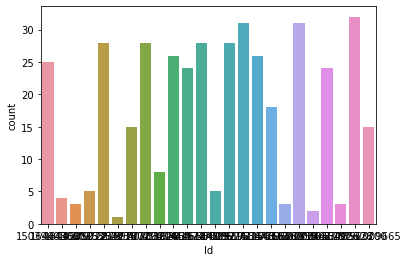

In [26]:
gb=sns.countplot(x='Id', data=df)


#### Lets see how many records of sleep are there for each user

In [7]:
x=pd.Series(df.groupby('Id').count()['SleepDay'])
x.sort_values(ascending=False)

Id
8378563200    32
6962181067    31
5553957443    31
4702921684    28
2026352035    28
3977333714    28
4445114986    28
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    24
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: SleepDay, dtype: int64

In [12]:
(x<10).sum()

9

In [16]:
10/62

0.16129032258064516

* This shows that some of the users have actively used the device to track the sleep cycle while many of the users have hardly used it to track the sleep.

Lets now see how many what is the average minutes of sleep Vs average minutes of time in bed for the uses

In [8]:
gg=df.groupby("Id").mean()[['TotalMinutesAsleep', 'TotalTimeInBed']]

In [9]:
gg.head(2)

,TotalMinutesAsleep,TotalTimeInBed
Id,,
1503960366,360.28,383.2
1644430081,294.00,346.0


Text(0.5, 1.0, 'Sleep Vs time in bed')

<Figure size 432x288 with 0 Axes>

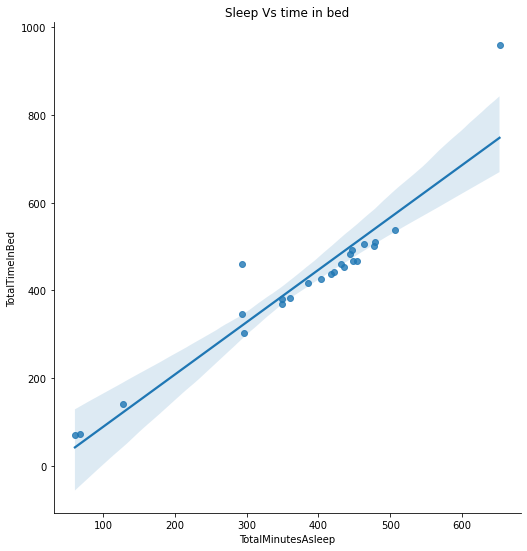

In [17]:
fig=plt.figure()
gb=sns.lmplot(x='TotalMinutesAsleep', y='TotalTimeInBed',data=gg, fit_reg=True)
gb.fig.set_figwidth(8)
gb.fig.set_figheight(8)
plt.title('Sleep Vs time in bed')

In [19]:
gb.savefig('/home/sunit.kapuria/data analyst course/case_study_2/sleep.png')

### There is a clear positive correlation between the sleep and time in bed , except few outliers. 
* lets calculate the positive correlation value

In [42]:
import statistics
from scipy.stats import pearsonr

In [43]:
list1=gg['TotalMinutesAsleep']
list2=gg['TotalTimeInBed']
corr, _ = pearsonr(list1, list2)
print('%.3f' % corr)

0.940


### positive correlation 0.94

Lets concat the count of sleeps, with the new dataframe "gg"

In [44]:
new_df=pd.concat([gg,x], axis=1)

In [52]:
new_df.head(5)

,Id,TotalMinutesAsleep,TotalTimeInBed,count_sleepday
0,1503960366,360.280000,383.200000,25
1,1644430081,294.000000,346.000000,4
2,1844505072,652.000000,961.000000,3
3,1927972279,417.000000,437.800000,5
4,2026352035,506.178571,537.642857,28


In [47]:
new_df.reset_index(inplace=True)

In [51]:
new_df.rename(columns={'SleepDay':"count_sleepday"}, inplace=True)

Lets save this new agregrated csv file for futher analysis through visualization

In [53]:
new_df.to_csv("/home/sunit.kapuria/data analyst course/case_study_2/new_sleep.csv", index=False)